# TODO: Make a TEST dataset (and make it large (80%) of total)

In [70]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

# Model
from sklearn.linear_model import LogisticRegression

from helpers import get_score

### Ładujemy z pliku dataset

In [71]:
cardio_data = pd.read_csv("data/messy_data.csv")
cardio_data.head()

,age,height,weight,ap_hi,ap_lo,cardio,cholesterol,glucose,lifestyle
0,18393,168,62.0,110,80,0,normal,normal,is_active
1,20228,156,85.0,140,90,1,high above normal,normal,is_active
2,18857,165,64.0,130,70,1,high above normal,normal,NaN
3,17623,169,82.0,150,100,1,normal,normal,is_active
4,17474,156,56.0,100,60,0,normal,normal,NaN


### Co przewidujemy?

In [72]:
cardio_data.cardio.value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

Widzimy, że klasy są raczej zbalansowane, więc możemy tu użyć **accuracy_score**.

### Co będzie, jeśli od razu coś wytrenujemy?

Skoro nasza regresja logistyczna nie działa z wartościami tekstowymi, na razie nie bierzmy ich pod uwagę.

In [73]:
numeric_cardio_data = cardio_data.drop(
    ['cholesterol', 'glucose', 'lifestyle'],
    axis=1
)

In [74]:
numeric_cardio_data.head()

,age,height,weight,ap_hi,ap_lo,cardio
0,18393,168,62.0,110,80,0
1,20228,156,85.0,140,90,1
2,18857,165,64.0,130,70,1
3,17623,169,82.0,150,100,1
4,17474,156,56.0,100,60,0


In [75]:
train_X, test_X, train_y, test_y = train_test_split(
    numeric_cardio_data.drop("cardio", axis=1),
    numeric_cardio_data['cardio'],
    test_size=0.2
)

In [76]:
train_y

38384    1
46820    0
19046    0
36503    0
16364    1
        ..
32027    1
23228    0
66372    1
37367    1
34401    1
Name: cardio, Length: 56000, dtype: int64

In [77]:
baseline_model = LogisticRegression()

baseline_model.fit(train_X, train_y)
baseline_preds = baseline_model.predict(test_X)

acc = accuracy_score(test_y, baseline_preds)
print(f"Accuracy score: {round(100 * acc, 2)} %")

Accuracy score: 69.49 %


### Not bad, but can we do better?

<img src="https://i.pinimg.com/736x/a8/ef/58/a8ef58e480da3676dc81f0ffc191807b--swimmer-girl-problems-jeep-humor.jpg" width=400 height=400 />

# Exploratory Data Analysis (EDA)

In [78]:
# TODO: What is it and how it is used?

### Jakie widzimy tutaj typy atrybutów?

In [79]:
cardio_data.dtypes

age              int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cardio           int64
cholesterol     object
glucose         object
lifestyle       object
dtype: object

In [80]:
numeric_features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
categorical_features = ["cholesterol", "glucose", "lifestyle"]

In [81]:
cardio_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   height       70000 non-null  int64  
 2   weight       70000 non-null  float64
 3   ap_hi        70000 non-null  int64  
 4   ap_lo        70000 non-null  int64  
 5   cardio       70000 non-null  int64  
 6   cholesterol  70000 non-null  object 
 7   glucose      70000 non-null  object 
 8   lifestyle    57565 non-null  object 
dtypes: float64(1), int64(5), object(3)
memory usage: 4.8+ MB


In [82]:
cardio_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   height       70000 non-null  int64  
 2   weight       70000 non-null  float64
 3   ap_hi        70000 non-null  int64  
 4   ap_lo        70000 non-null  int64  
 5   cardio       70000 non-null  int64  
 6   cholesterol  70000 non-null  object 
 7   glucose      70000 non-null  object 
 8   lifestyle    57565 non-null  object 
dtypes: float64(1), int64(5), object(3)
memory usage: 4.8+ MB


In [83]:
cardio_data.describe()

,age,height,weight,ap_hi,ap_lo,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,164.359229,74.205690,128.817286,96.630414,0.499700
std,2467.251667,8.210126,14.395757,154.011419,188.472530,0.500003
min,10798.000000,55.000000,10.000000,-150.000000,-70.000000,0.000000
25%,17664.000000,159.000000,65.000000,120.000000,80.000000,0.000000
50%,19703.000000,165.000000,72.000000,120.000000,80.000000,0.000000
75%,21327.000000,170.000000,82.000000,140.000000,90.000000,1.000000
max,23713.000000,250.000000,200.000000,16020.000000,11000.000000,1.000000


### Handling errors in data

In [84]:
cardio_data['age_in_years'] = cardio_data.age // 365

Max age is 64
Minimum age is 29


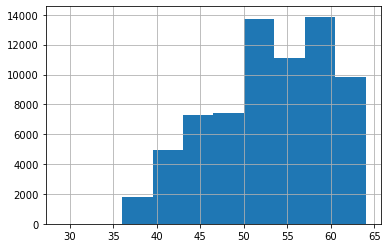

In [85]:
cardio_data.age_in_years.hist()
print(f"Max age is {cardio_data.age_in_years.max()}")
print(f"Minimum age is {cardio_data.age_in_years.min()}")

In [86]:
def info_num_feature(series: pd.Series):
    
    print(series.name)
    print(f"Max: {series.max()}")
    print(f"Min: {series.min()}")
    print()

In [87]:
for feature_name in numeric_features:
    info_num_feature(cardio_data[feature_name])

age
Max: 23713
Min: 10798

height
Max: 250
Min: 55

weight
Max: 200.0
Min: 10.0

ap_hi
Max: 16020
Min: -150

ap_lo
Max: 11000
Min: -70



Widzimy, że w przypadku atrybutów z ciśnieniem mamy pewne błędy. Przyjrzyjmy się im bardziej szczegółowo:

In [88]:
print(f"Minimal systolic pressure is : {cardio_data.ap_hi.min()}")
print(f"Minimal diastolic pressure is : {cardio_data.ap_lo.min()}")

cardio_data.ap_hi = cardio_data.ap_hi.apply(np.abs)
cardio_data.ap_lo = cardio_data.ap_lo.apply(np.abs)

print(f"Minimal systolic pressure is: {cardio_data.ap_hi.min()}")
print(f"Minimal diastolic pressure is : {cardio_data.ap_lo.min()}")

Minimal systolic pressure is : -150
Minimal diastolic pressure is : -70
Minimal systolic pressure is: 1
Minimal diastolic pressure is : 0


### Removing outliers

In [89]:
SYSTOLIC_THR_MAX = 230
DIASTOLIC_THR_MAX = 150

SYSTOLIC_THR_MIN = 80
DIASTOLIC_THR_MIN = 40

In [90]:
bad_systolic_data = cardio_data[(cardio_data.ap_hi > SYSTOLIC_THR_MAX) | (cardio_data.ap_hi < SYSTOLIC_THR_MIN)]
cardio_data.drop(bad_systolic_data.index, inplace=True)

bad_diastolic_data = cardio_data[(cardio_data.ap_lo > DIASTOLIC_THR_MAX) | (cardio_data.ap_lo < DIASTOLIC_THR_MIN)]
cardio_data.drop(bad_diastolic_data.index, inplace=True)

### Removing pressure data errors

In [91]:
invalid_pressure = cardio_data[cardio_data.ap_lo >= cardio_data.ap_hi]
cardio_data.drop(invalid_pressure.index, inplace=True)

In [92]:
numeric_data = cardio_data[['age_in_years', 'height', 'weight', 'ap_hi', 'ap_lo', 'cardio']]
numeric_data

,age_in_years,height,weight,ap_hi,ap_lo,cardio
0,50,168,62.0,110,80,0
1,55,156,85.0,140,90,1
2,51,165,64.0,130,70,1
3,48,169,82.0,150,100,1
4,47,156,56.0,100,60,0
...,...,...,...,...,...,...
69995,52,168,76.0,120,80,0
69996,61,158,126.0,140,90,1
69997,52,183,105.0,180,90,1
69998,61,163,72.0,135,80,1


In [93]:
train_X, test_X, train_y, test_y = train_test_split(
    numeric_data.drop('cardio', axis=1),
    numeric_data['cardio']
)

In [94]:
from helpers import get_score

get_score(train_X, test_X, train_y, test_y)

Accuracy score: 72.03 %


0.7203192356984738

### Categorical variables

In [95]:
cat_data = cardio_data[categorical_features]
cat_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68662 entries, 0 to 69999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   cholesterol  68662 non-null  object
 1   glucose      68662 non-null  object
 2   lifestyle    56444 non-null  object
dtypes: object(3)
memory usage: 2.1+ MB


#### Ordinal encoding

In [103]:
ord_encoder = OrdinalEncoder()

cat_data1 = cat_data.copy()
ordinal_cols = ['cholesterol', 'glucose']

# applying
cat_data1[ordinal_cols] = ord_encoder.fit_transform(cat_data[ordinal_cols])

#### One Hot Encoding

In [104]:
# TODO: Make it better!!!

oh_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

oh_columns = ['lifestyle']

oh_data = pd.DataFrame(oh_encoder.fit_transform(cat_data1[oh_columns]))

# bring back the index
oh_data.index = cat_data1.index
oh_data

,0,1,2,3,4,5,6,7
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
69996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
69997,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [97]:
# TODO: Wróć do podziału na train i test, w czym jest problem? (Walidacja krzyżowa)